# Поиск хаотического поведения в динамических системах

Мы будем рассматривать обыкновенное дифф. уравнение (точка = производная по времени)
\begin{equation}
\ddot{u} + \gamma \dot{u} +\omega u + \lambda u^3 = f \sin(\nu t), \, u(0) = u_0,\, \dot{u}(0)=u_1,\, t>0
\end{equation}
и искать значения параметров $\gamma, \omega, \lambda, f, \nu$ при которых
решения этого уравнения будут демонстрировать [хаотическое поведение](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F_%D1%85%D0%B0%D0%BE%D1%81%D0%B0). То есть поведение системы, при котором даже незначительные изменения в начальных условиях могут привести к значительным различиям в конечном результате.

Численно же мы будем решать это уравнение в виде системы на вектор-функцию
$y \equiv \left(
\begin{array}{c}
u \\
\dot{u}
\end{array}
\right)$, которая имеет следующий вид
\begin{equation}
\dot{y} = f(y,\, t)
\end{equation}
или, более подробно
\begin{equation}
\left(  \begin{array}{c} \dot{y_1} \\ \dot{y_2} \end{array} \right) =
\left(  \begin{array}{c}  y_2 \\ - \gamma y_2 -\omega y_1 - \lambda y_1^3 + f \sin(\nu t) \end{array} \right)
\end{equation}

In [ ]:
# Подгружаем необходимые пакеты
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.animation as animation

In [ ]:
# rhs означает right hand side
# Порядок первых двух аргументов выбран именно таким, чтобы можно было подать её в RK45
def rhs(t,  # Аргумент функции u
        y,  # Функция
        γ = 0.0,  # Коэффициент трения
        ω = 0.0,  # Квадрат обственной частоты осциллятора
        λ = 0.0,  # Константа перед нелинейностью
        f = 0.0,  # Амплитуда внешней вынуждающей силы
        ν = 0.0) : # Частота внешней вынуждающей силы
    return np.array([y[1],-γ*y[1] - ω*y[0] - λ*y[0]**3 + f * np.cos(ν*t)])

Для начала попробуем решить нашу систему простейшим численным методом - [методом Эйлера](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%AD%D0%B9%D0%BB%D0%B5%D1%80%D0%B0#:~:text=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%20%D0%AD%D0%B9%D0%BB%D0%B5%D1%80%D0%B0%20%E2%80%94%20%D0%BF%D1%80%D0%BE%D1%81%D1%82%D0%B5%D0%B9%D1%88%D0%B8%D0%B9%20%D1%87%D0%B8%D1%81%D0%BB%D0%B5%D0%BD%D0%BD%D1%8B%D0%B9%20%D0%BC%D0%B5%D1%82%D0%BE%D0%B4,%D0%BE%D0%B4%D0%BD%D0%BE%D1%88%D0%B0%D0%B3%D0%BE%D0%B2%D1%8B%D0%BC%20%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D0%BE%D0%BC%20%D0%BF%D0%B5%D1%80%D0%B2%D0%BE%D0%B3%D0%BE%20%D0%BF%D0%BE%D1%80%D1%8F%D0%B4%D0%BA%D0%B0%20%D1%82%D0%BE%D1%87%D0%BD%D0%BE%D1%81%D1%82%D0%B8.). Его основной идей является замена дифференциального уравнения [конечной разностью](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BD%D0%B5%D1%87%D0%BD%D1%8B%D0%B5_%D1%80%D0%B0%D0%B7%D0%BD%D0%BE%D1%81%D1%82%D0%B8):

\begin{equation}
y_{n+1} = y_n + \Delta t f(y_n,\, t_n)
\end{equation}

In [ ]:
def integrate_euler(y0, # Начльные условия
                    t_max, # Время,вплоть до которого вычисляется начальная задача
                    n, # Число узлов дискретизации
                    γ = 0.0, ω = 0.0, λ = 0.0, f = 0.0, ν = 0.0): # Параметры уравнения
    t = np.linspace(0, t_max, num = n)
    y = np.zeros((2, n))
    y[:,0] = y0
    Δt = t[1]
    for i in range(n-1):
        y[:, i+1] = y[:, i] + Δt * rhs(t[i], y[:, i],  γ, ω , λ , f , ν )
    return y, t

In [ ]:
y0 = np.array([0., 1.0])
t_max = 10.
n = 1000
y, t = integrate_euler(y0, t_max, n,  ω = 1.)

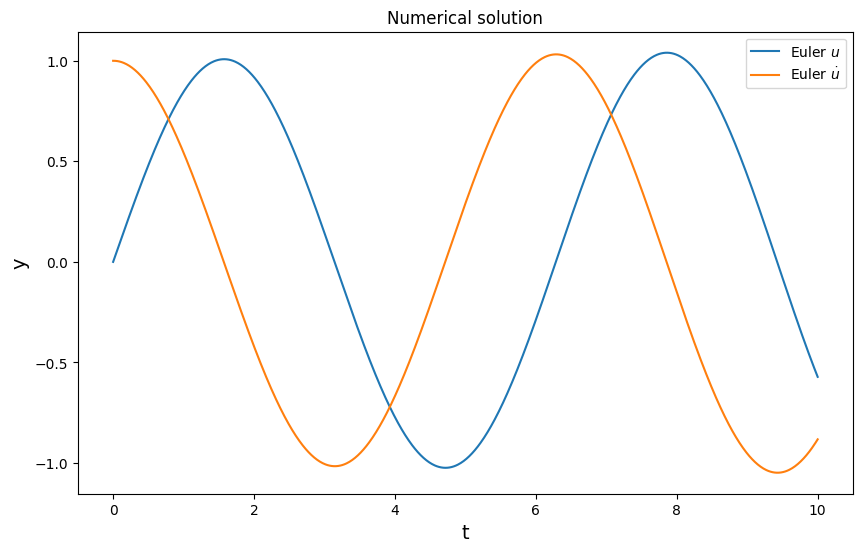

In [ ]:
# Строим график полученного y
plt.figure(figsize=(10,6))
plt.title("Numerical solution")
plt.plot(t,y[0,:], label = r'Euler $u$')
plt.plot(t,y[1,:], label = r'Euler $\dot{u}$')
plt.ylabel(r'y', fontsize=14)
plt.xlabel(r't', fontsize=14)
plt.legend()
plt.show()

Строим [фазовую плоскость](https://ru.wikipedia.org/wiki/%D0%A4%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D1%8F_%D0%BF%D0%BB%D0%BE%D1%81%D0%BA%D0%BE%D1%81%D1%82%D1%8C) для того, чтобы посмотреть на траекторию системы дифференциальных уравнений. В данном случае видно, что наше решение и аналитическое совпадают, но погрешность вычислений достаточно велика:

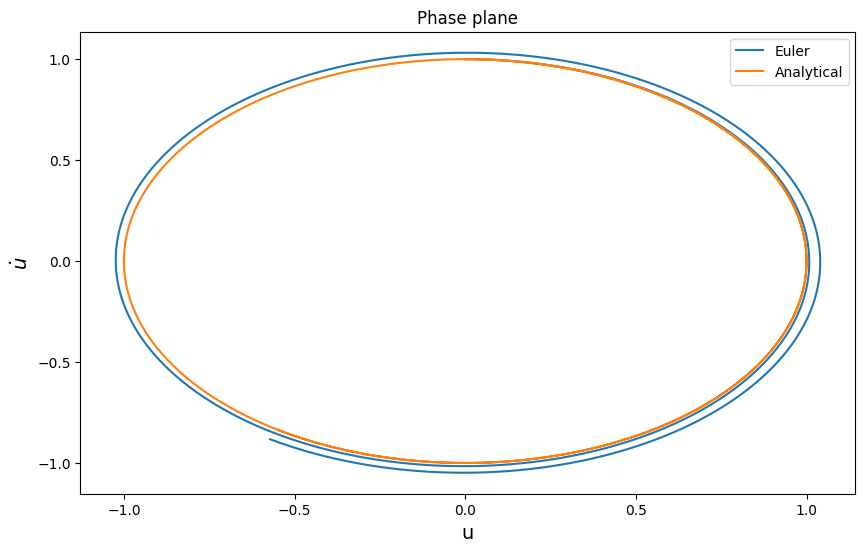

In [ ]:
# Строим график полученного решения на фазовой плоскости
plt.figure(figsize=(10,6))
plt.title("Phase plane")
plt.plot(y[0,:], y[1,:], label = 'Euler')
plt.plot(np.sin(t), np.cos(t), label = 'Analytical')
plt.ylabel(r'$\dot{u}$', fontsize=14)
plt.xlabel(r'u', fontsize=14)
plt.legend()
plt.show()

Для того, чтобы посмотреть на точность численного решения используем метрику MAE ([mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error)):
\begin{equation}
MAE(y_{true}, y_{ppred}) = \frac{1}{N}\sum_{i=1}^{N}|y_i-f(x_i)|
\end{equation}
На графике видно, что со временем ошибка метода Эйлера начинает расти:

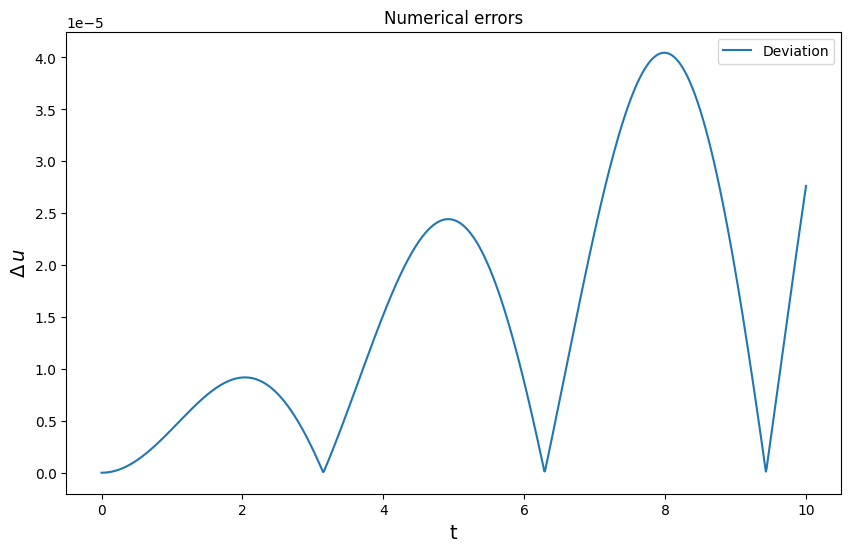

In [ ]:
# Строим график отличия численного решения от аналитического
plt.figure(figsize=(10,6))
plt.title("Numerical errors")
plt.plot(t,abs(y[0,:]-np.sin(t))/n, label = 'Deviation')
#plt.plot(t,y[0,:], label = 'Euler')
#plt.plot(t,np.sin(t), label = 'Analytic solution')
plt.ylabel(r'$\Delta \, u$', fontsize=14)
plt.xlabel(r't', fontsize=14)
plt.legend()
plt.show()

В наших вычислениях нам понадобится эволюционировать систему до больших времён ($t \sim 100$), поэтому точности метода Эйлера нам не хватит.

В качестве дальнейшего шага нужно будет решить уравнение, используя [метод Рунге-Кутты 5(4) порядка](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html), точность которого гораздо выше точности метода Эйлера. Также для анализа хаотического поведения мы будем вычислять
автокореллятор $C(\tau)$, используя [метод трапеций](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapezoid.html#scipy.integrate.trapezoid) и
[метод Симпсона](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simpson.html#scipy.integrate.simpson).
Автокореллятор определяется следующим выражением
\begin{gather}
C(\tau) \equiv \lim_{T \to +\infty} \frac{1}{T} \int_0^{T} \hat{u}(t) \hat{u}(t+\tau) dt,\\
\hat{u}(t) = u(t) - <u>, \\
<u> \equiv \lim_{T \to +\infty} \frac{1}{T} \int_0^{T} u(t) dt.
\end{gather}
    
Вместо предела численное $T$ должно быть просто достаточно большим, но конечным.
    
В качестве примера вычислим автокоррелятор для уравнения $\ddot{u}+ u = 0, \, \dot{u}(0)=1,\, u(0)=0$. Решением этого уравнения
будет $u(t)=\sin (t)$. Подставив это выражение в формулу для $C(\tau)$, получим следующий результат:
\begin{gather}
    <u> =  \lim_{T \to +\infty} \frac{1}{T} \int_0^{T} \sin(t) dt = \lim_{T \to +\infty} \frac{1-\cos(T)}{T} = 0,\\
    C(\tau) = \lim_{T \to +\infty} \frac{1}{T} \int_0^{T} \sin(t) \cdot \sin(t+\tau) = \lim_{T \to +\infty} \frac{1}{2T} \int_0^{T} \left( \cos(\tau) - \cos(\tau + 2t) \right) dt = \frac{\cos(\tau)}{2}.
\end{gather}
Схожего рода периодическое поведение $C(\tau)$ мы и будем связывать с отсутствием хаотического поведения у системы.

## Начнём с автокоррелятора

Расчёт среднего через метод трапеции

In [ ]:
def mean_trap(f , t):
    outLst = []
    if (len(f.shape)) == 2 :
        for i in range(2) :
            fMeanI = integrate.trapezoid(f[i,:], x = t)
            outLst.append(fMeanI)
    elif  (len(f.shape)) == 1 :
        fMeanI = integrate.trapezoid(f, x = t)
        outLst.append(fMeanI)
    else :
        print("Incorrect dimensions of f!")
        return
    return np.array(outLst)/t[-1]

Расчёт среднего через метод Симпосона

In [ ]:
def mean_simpson(f , t):
    outLst = []
    if (len(f.shape)) == 2 :
        for i in range(2) :
            fMeanI = integrate.simpson(f[i,:], x = t)
            outLst.append(fMeanI)
    elif  (len(f.shape)) == 1 :
        fMeanI = integrate.simpson(f, x = t)
        outLst.append(fMeanI)
    else :
        print("Incorrect dimensions of f!")
        return
    return np.array(outLst)/t[-1]

In [ ]:
mean_trap(y,t)

array([ 0.18794635, -0.05810673])

Реализация атвокоррелятор методом трапеции + Эйлера

In [ ]:
def C(y0,  T : float, n : int,  γ = 0.0, ω = 0.0, λ = 0.0, f = 0.0, ν = 0.0):
    y, t = integrate_euler(y0, T, n, γ, ω, λ, f, ν)
    τ = t
    yMean =  mean_trap(y[0,:], t)*np.ones(n)
    Cout = np.zeros(n)
    for i in range(n) :
        y0aux = y[:, i]
        yAux, tAux = integrate_euler(y0aux, T, n, γ, ω, λ, f, ν)
        Cout[i] = integrate.trapezoid((y[0,:]-yMean)*(yAux[0,:]-yMean), x = t)
    return Cout/T, τ

In [ ]:
C_mean_trap, τ = C(y0, t_max, n,  ω = 1.)

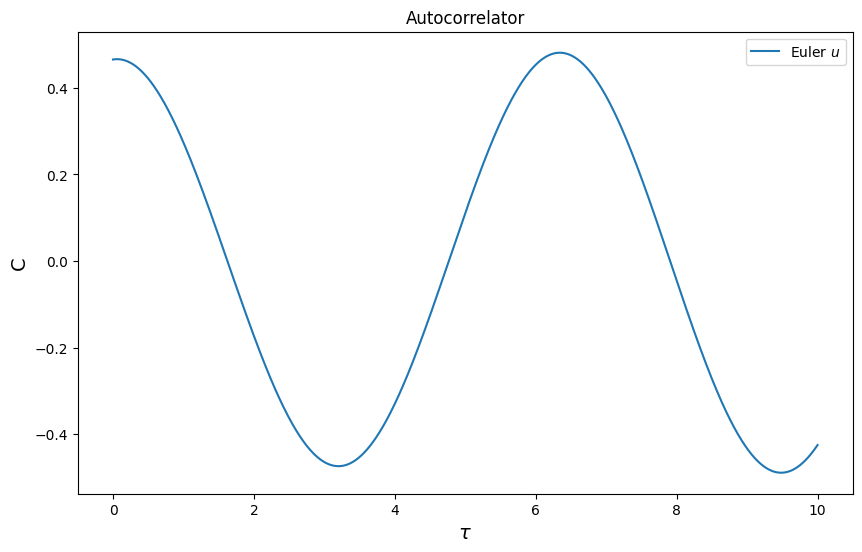

In [ ]:
# Строим график полученного C
plt.figure(figsize=(10,6))
plt.title("Autocorrelator")
plt.plot(t,C_mean_trap, label = r'Euler $u$')
plt.ylabel(r'C', fontsize=14)
plt.xlabel(r'$\tau$', fontsize=14)
plt.legend()

In [ ]:
def integrate_rk(y0, # Начльные условия
                t_max, # Время,вплоть до которого вычисляется начальная задача
                n, # Число узлов дискретизации
                γ = 0.0, ω = 0.0, λ = 0.0, f = 0.0, ν = 0.0): # Параметры уравнения
    t = np.linspace(0, t_max, num = n)
    sol = solve_ivp(rhs, [0, t_max], y0, t_eval=t, args=(γ, ω, λ, f, ν))
    return sol.y, sol.t

In [ ]:
y0 = np.array([0., 1.0])
t_max = 100.
n = 1000
y, t = integrate_rk(y0, t_max, n,  ω = 1.)

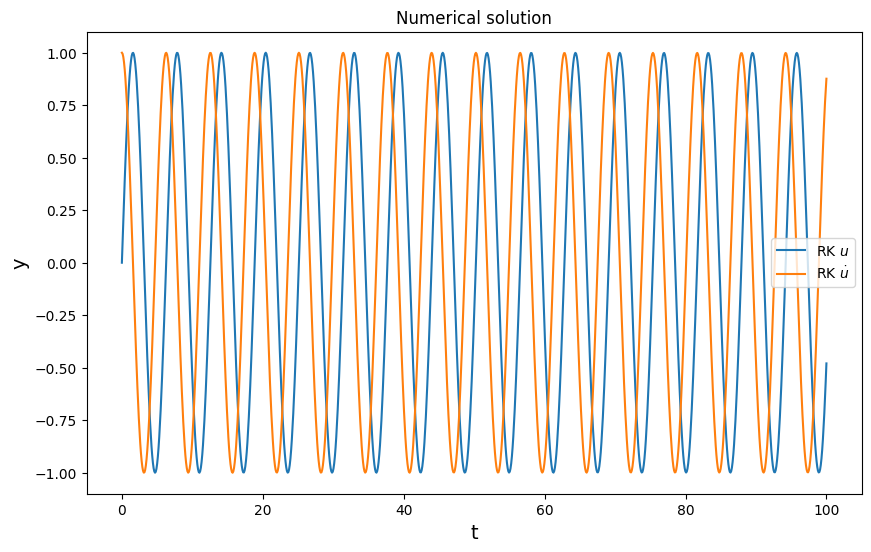

In [ ]:
# Строим график полученного y
plt.figure(figsize=(10,6))
plt.title("Numerical solution")
plt.plot(t,y[0,:], label = r'RK $u$')
plt.plot(t,y[1,:], label = r'RK $\dot{u}$')
plt.ylabel(r'y', fontsize=14)
plt.xlabel(r't', fontsize=14)
plt.legend()

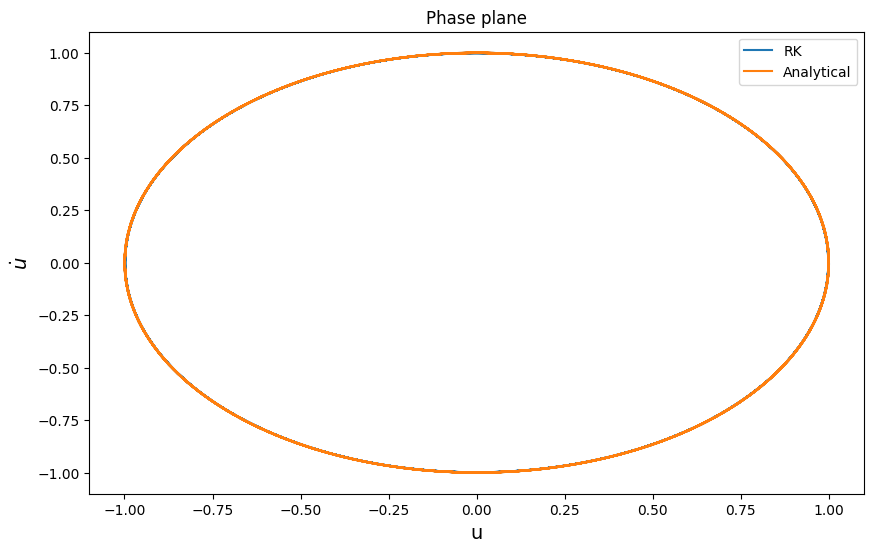

In [ ]:
# Строим график полученного решения на фазовой плоскости
plt.figure(figsize=(10,6))
plt.title("Phase plane")
plt.plot(y[0,:], y[1,:], label = 'RK')
plt.plot(np.sin(t), np.cos(t), label = 'Analytical')
plt.ylabel(r'$\dot{u}$', fontsize=14)
plt.xlabel(r'u', fontsize=14)
plt.legend()

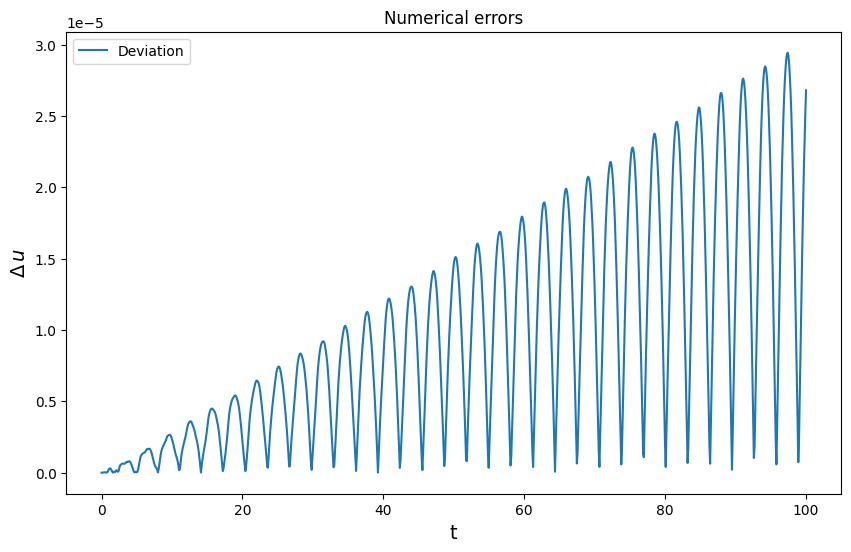

In [ ]:
# Строим график отличия численного решения от аналитического
plt.figure(figsize=(10,6))
plt.title("Numerical errors")
plt.plot(t,abs(y[0,:]-np.sin(t))/n, label = 'Deviation')
#plt.plot(t,y[0,:], label = 'Euler')
#plt.plot(t,np.sin(t), label = 'Analytic solution')
plt.ylabel(r'$\Delta \, u$', fontsize=14)
plt.xlabel(r't', fontsize=14)
plt.legend()

Реализация атвокоррелятор методом трапеции + метод Рунге-Кутты

In [ ]:
def Crk(y0,  T : float, n : int,  γ = 0.0, ω = 0.0, λ = 0.0, f = 0.0, ν = 0.0):
    y, t = integrate_rk(y0, T, n, γ, ω, λ, f, ν)
    τ = t
    yMean =  mean_trap(y[0,:], t)*np.ones(n)
    Cout = np.zeros(n)
    for i in range(n) :
        y0aux = y[:, i]
        yAux, tAux = integrate_rk(y0aux, T, n, γ, ω, λ, f, ν)
        Cout[i] = integrate.trapezoid((y[0,:]-yMean)*(yAux[0,:]-yMean), x = t)
    return Cout/T, τ

In [ ]:
C_rk_trap, τ = Crk(y0, t_max, n,  ω = 1.)

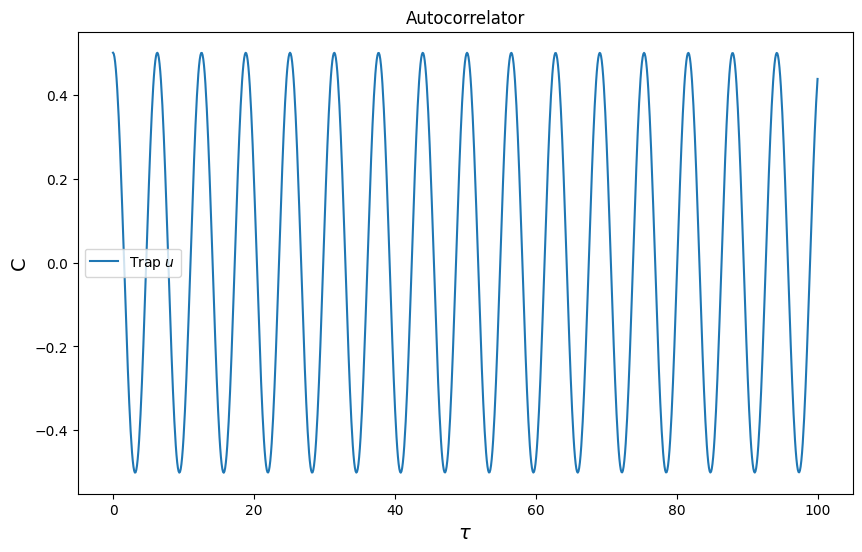

In [ ]:
# Строим график полученного C
plt.figure(figsize=(10,6))
plt.title("Autocorrelator")
plt.plot(t,C_rk_trap, label = r'Trap $u$')
plt.ylabel(r'C', fontsize=14)
plt.xlabel(r'$\tau$', fontsize=14)
plt.legend()

Реализация атвокоррелятор методом Симпсона + метод Рунге-Кутты

In [ ]:
def Csimps(y0,  T : float, n : int,  γ = 0.0, ω = 0.0, λ = 0.0, f = 0.0, ν = 0.0):
    y, t = integrate_rk(y0, T, n, γ, ω, λ, f, ν)
    τ = t
    yMean =  mean_simpson(y[0,:], t)*np.ones(n)
    Cout = np.zeros(n)
    for i in range(n) :
        y0aux = y[:, i]
        yAux, tAux = integrate_rk(y0aux, T, n, γ, ω, λ, f, ν)
        Cout[i] = integrate.simpson((y[0,:]-yMean)*(yAux[0,:]-yMean), x = t)
    return Cout/T, τ

In [ ]:
C_rk_simps, τ = Csimps(y0, t_max, n,  ω = 1.)

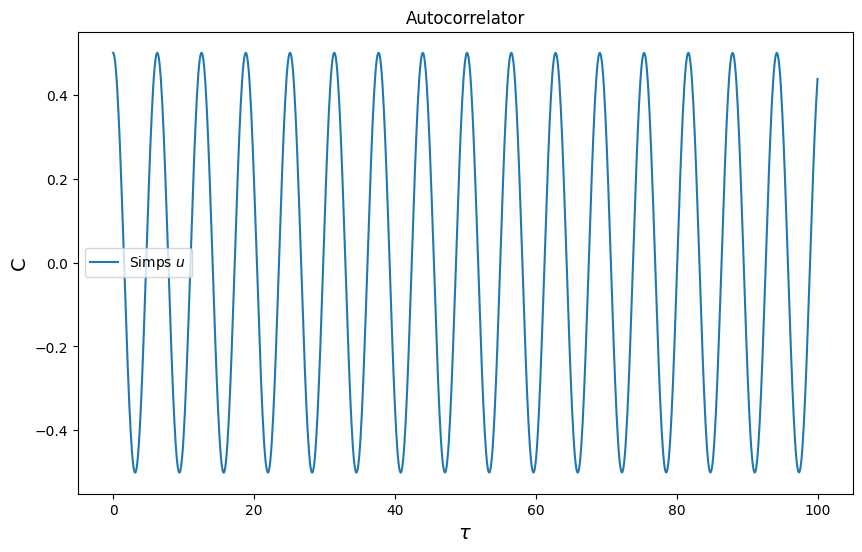

In [ ]:
# Строим график полученного C
plt.figure(figsize=(10,6))
plt.title("Autocorrelator")
plt.plot(t,C_rk_simps, label = r'Simps $u$')
plt.ylabel(r'C', fontsize=14)
plt.xlabel(r'$\tau$', fontsize=14)
plt.legend()

Также для анализа хаотического поведения мы будем строить [отображение Пуанкаре](https://ru.wikipedia.org/wiki/%D0%9E%D1%82%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9F%D1%83%D0%B0%D0%BD%D0%BA%D0%B0%D1%80%D0%B5) (далее будем называть его сечением). В нашем случае это будет значение $u, \dot{u}$ в момент времени $\frac{2\pi n}{\nu}$, $n=0,1,2,\ldots$ Если набор таких сечений будет более-менее равномерно расбросан по пространству $(u, \dot{u})$, то это будет говорить в пользу хаотического поведения системы.

Функция для расчёта сечения Пуанкаре

In [ ]:
def poincare_section(y0, n, n_peroids, γ, ω, λ, f, ν  ):
    t_max = 2*np.pi/ν*n_peroids
    y, t = integrate_rk(y0, t_max, n,  γ , ω , λ , f, ν)
    poincare_states = []
    for j in range(n_peroids):
        poincare_states.append(y[:, int(j*(n-1)/n_peroids)].tolist())

    return np.array(poincare_states)

## Проверяем работу функций

In [ ]:
y0 = np.array([0., 1.0])
n = 1000
dt = 0.01
t_max = 100.
γ = 0.0  # Коэффициент трения
ω = 0.5  # Квадрат обственной частоты осциллятора
λ = 0.9  # Константа перед нелинейностью
f = 0.12  # Амплитуда внешней вынуждающей силы
ν = 1  # Частота внешней вынуждающей силы

In [ ]:
y, t = integrate_rk(y0, t_max, n, γ, ω, λ, f, ν)

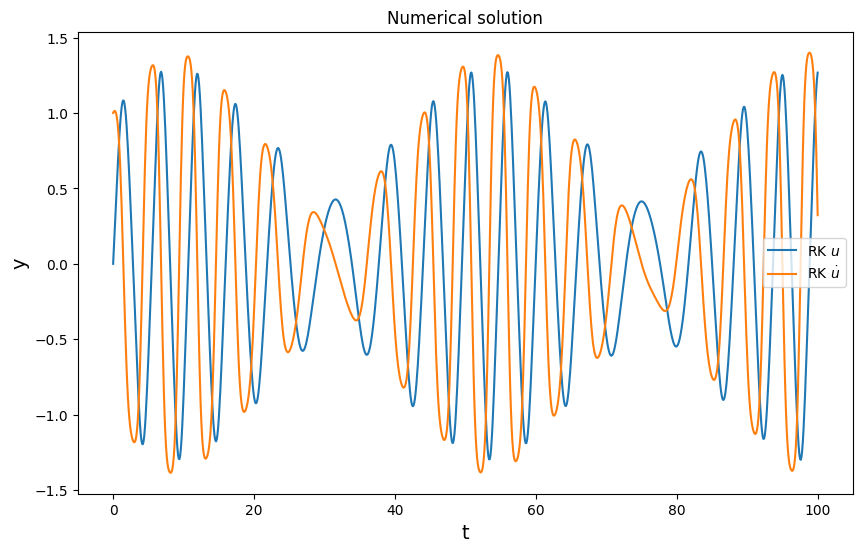

In [ ]:
# Строим график полученного y
plt.figure(figsize=(10,6))
plt.title("Numerical solution")
plt.plot(t,y[0,:], label = r'RK $u$')
plt.plot(t,y[1,:], label = r'RK $\dot{u}$')
plt.ylabel(r'y', fontsize=14)
plt.xlabel(r't', fontsize=14)
plt.legend()

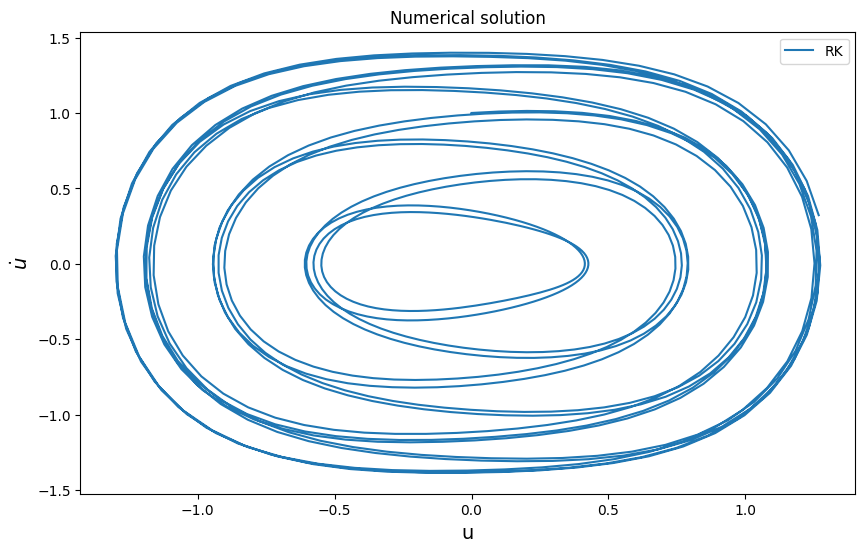

In [ ]:
# Строим график полученного решения на фазовой плоскости
plt.figure(figsize=(10,6))
plt.title("Numerical solution")
plt.plot(y[0,:], y[1,:], label = 'RK')
plt.ylabel(r'$\dot{u}$', fontsize=14)
plt.xlabel(r'u', fontsize=14)
plt.legend()

In [ ]:
# функция для фазовой плоскости
n_periods = 1000
poincare_states = poincare_section(y0, n, n_periods, γ, ω, λ, f, ν)
poincare_states

array([[ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.9906624 ,  0.99896864],
       ...,
       [ 0.90956866,  0.44038238],
       [ 1.05254821,  0.17259947],
       [ 1.00454909, -0.31833409]])

Text(0.5, 1.0, 'Poincare Section')

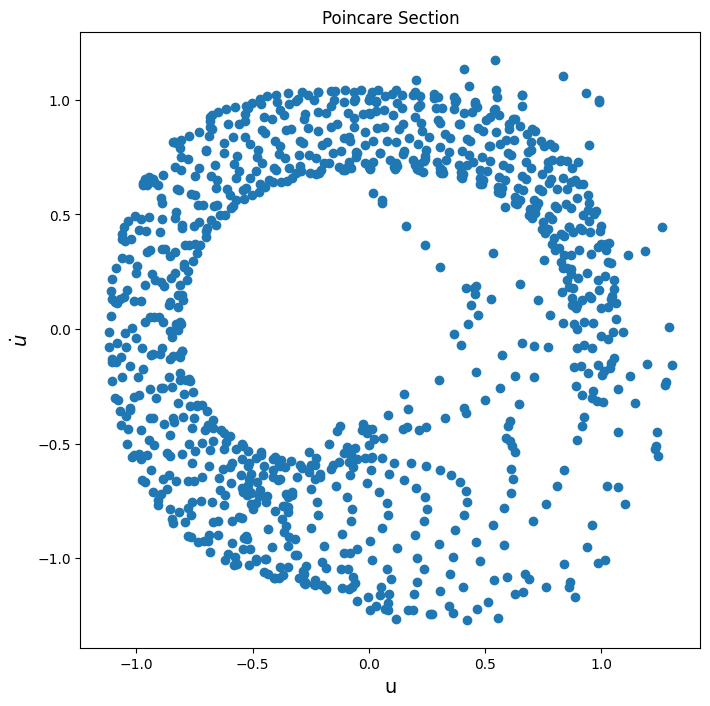

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(poincare_states[:,0], poincare_states[:,1])
plt.ylabel(r'$\dot{u}$', fontsize=14)
plt.xlabel(r'u', fontsize=14)
plt.title('Poincare Section')

In [ ]:
C_rk_simps, τ = Csimps(y0, t_max, n, γ, ω, λ, f, ν)

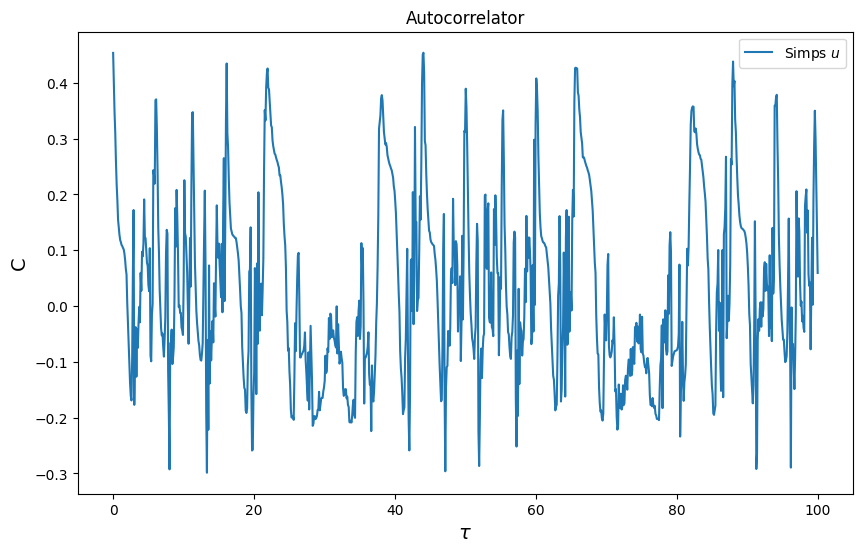

In [ ]:
# Строим график полученного C
plt.figure(figsize=(10,6))
plt.title("Autocorrelator")
plt.plot(τ,C_rk_simps, label = r'Simps $u$')
plt.ylabel(r'C', fontsize=14)
plt.xlabel(r'$\tau$', fontsize=14)
plt.legend()
plt.show()

## Демонстрация нескольких пару примеров решения диференциальных систем

Для начала посмотрим на то, как выглядит численное решение, фазовая плоскость и автокоррелятор, в хаотической системе следующего вида:
\begin{equation}
\ddot{u} + \omega u + \lambda u^3 = f \sin(\nu t), \, u(0) = u_0,\, \dot{u}(0)=u_1,\, t>0
\end{equation}

In [ ]:
y0 = np.array([0., 1.0])
n = 1000
dt = 0.01
t_max = 100.
γ = 0.0  # Коэффициент трения
ω = 0.1  # Квадрат обственной частоты осциллятора
λ = 1.2  # Константа перед нелинейностью
f = 1.5  # Амплитуда внешней вынуждающей силы
ν = 0.4  # Частота внешней вынуждающей силы

In [ ]:
y, t = integrate_rk(y0, t_max, n, γ, ω, λ, f, ν)

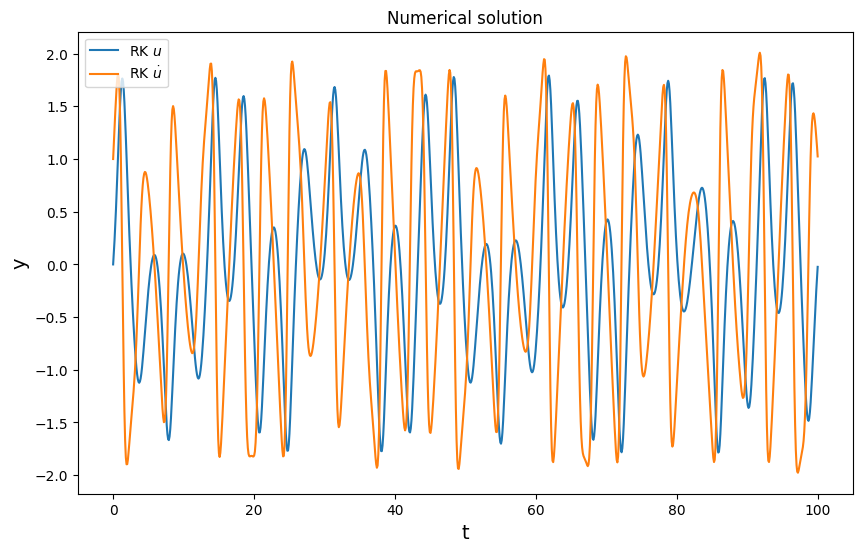

In [ ]:
# Строим график полученного y
plt.figure(figsize=(10,6))
plt.title("Numerical solution")
plt.plot(t,y[0,:], label = r'RK $u$')
plt.plot(t,y[1,:], label = r'RK $\dot{u}$')
plt.ylabel(r'y', fontsize=14)
plt.xlabel(r't', fontsize=14)
plt.legend()

In [ ]:
y.shape

(2, 1000)

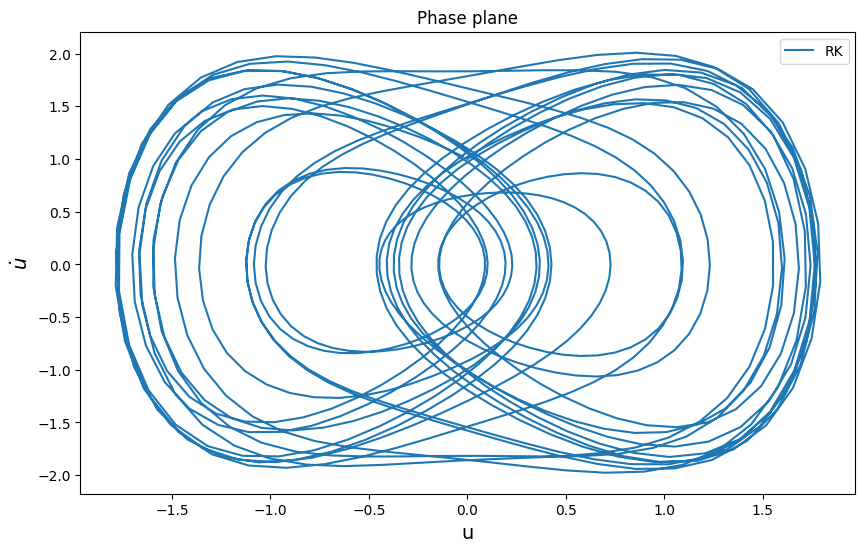

In [ ]:
# Строим график полученного решения на фазовой плоскости
plt.figure(figsize=(10,6))
plt.title("Phase plane")
plt.plot(y[0,:], y[1,:], label = 'RK')
plt.ylabel(r'$\dot{u}$', fontsize=14)
plt.xlabel(r'u', fontsize=14)
plt.legend()

In [ ]:
# функция для фазовой плоскости
n_periods = 1000
poincare_states = poincare_section(y0, n, n_periods, γ, ω, λ, f, ν)
poincare_states

array([[ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.08461785, -1.14271537],
       ...,
       [ 0.5395696 , -0.10400554],
       [ 0.62062461, -1.09881674],
       [ 0.88690418, -0.5085479 ]])

Text(0.5, 1.0, 'Poincare Section')

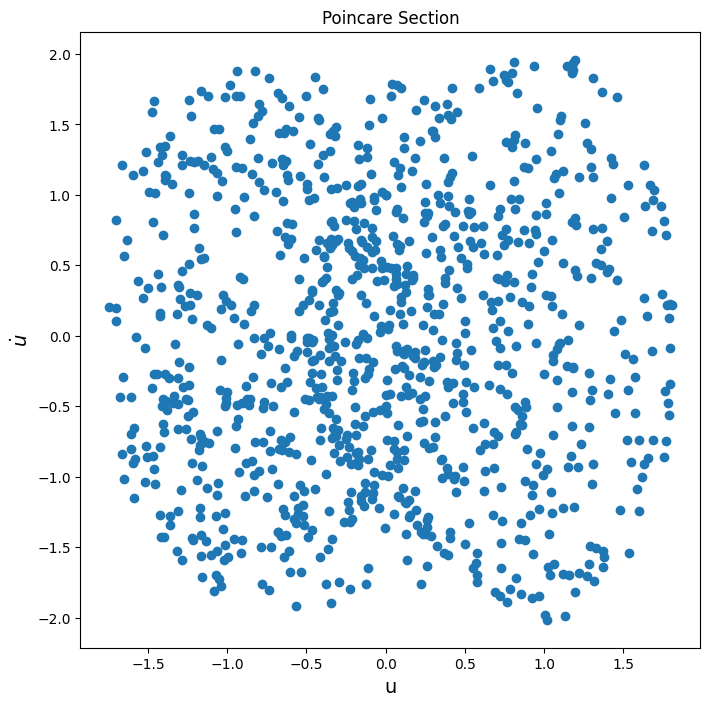

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(poincare_states[:,0], poincare_states[:,1])
plt.ylabel(r'$\dot{u}$', fontsize=14)
plt.xlabel(r'u', fontsize=14)
plt.title('Poincare Section')

In [ ]:
C_rk_simps, τ = Csimps(y0, t_max, n, γ, ω, λ, f, ν)

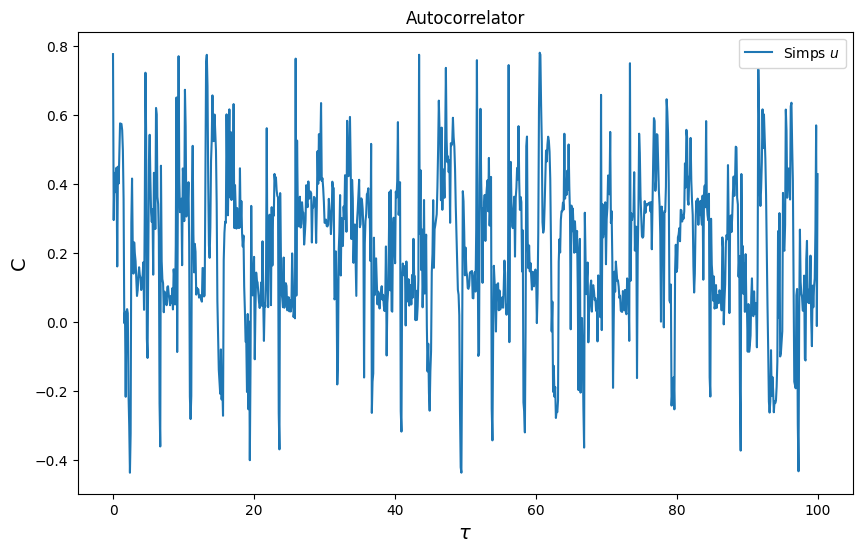

In [ ]:
# Строим график полученного C
plt.figure(figsize=(10,6))
plt.title("Autocorrelator")
plt.plot(τ,C_rk_simps, label = r'Simps $u$')
plt.ylabel(r'C', fontsize=14)
plt.xlabel(r'$\tau$', fontsize=14)
plt.legend()

А также рассмотрим пример пройстеший системы - гармонического осцилятора (математический маятник). Она имеет следующий дифференциальных вид:
\begin{equation}
\ddot{u} + \omega u = f \sin(\nu t), \, u(0) = u_0,\, \dot{u}(0)=u_1,\, t>0
\end{equation}

In [ ]:
y0 = np.array([0., 1.0])
n = 1000
dt = 0.01
t_max = 100.
γ = 0.0  # Коэффициент трения
ω = 0.5  # Квадрат обственной частоты осциллятора
λ = 0.0  # Константа перед нелинейностью
f = 0.0  # Амплитуда внешней вынуждающей силы
ν = 0.0  # Частота внешней вынуждающей силы

In [ ]:
y, t = integrate_rk(y0, t_max, n, γ, ω, λ, f, ν)

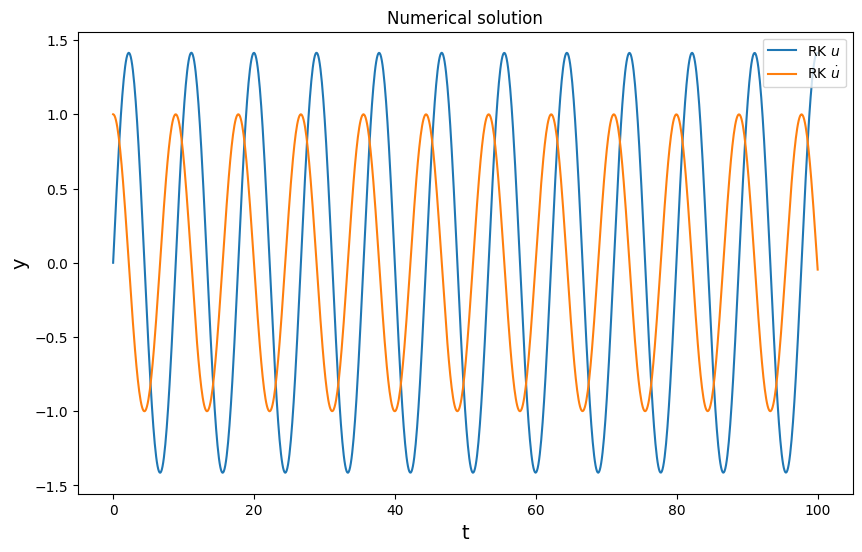

In [ ]:
# Строим график полученного y
plt.figure(figsize=(10,6))
plt.title("Numerical solution")
plt.plot(t,y[0,:], label = r'RK $u$')
plt.plot(t,y[1,:], label = r'RK $\dot{u}$')
plt.ylabel(r'y', fontsize=14)
plt.xlabel(r't', fontsize=14)
plt.legend()

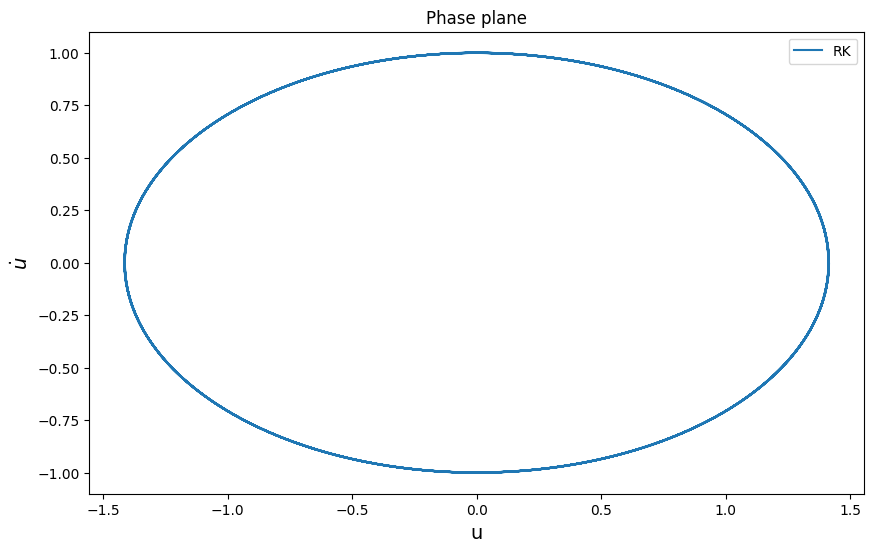

In [ ]:
# Строим график полученного решения на фазовой плоскости
plt.figure(figsize=(10,6))
plt.title("Phase plane")
plt.plot(y[0,:], y[1,:], label = 'RK')
plt.ylabel(r'$\dot{u}$', fontsize=14)
plt.xlabel(r'u', fontsize=14)
plt.legend()

In [ ]:
C_rk_simps, τ = Csimps(y0, t_max, n, γ, ω, λ, f, ν)

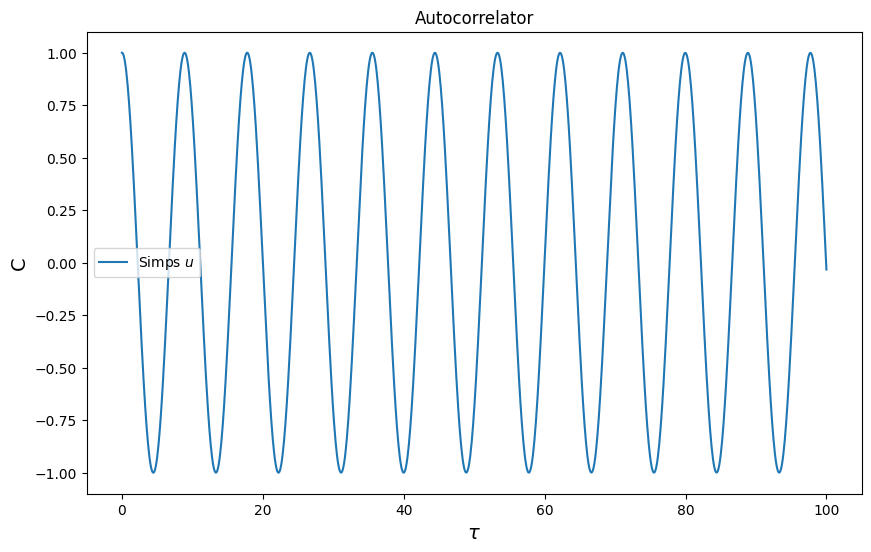

In [ ]:
# Строим график полученного C
plt.figure(figsize=(10,6))
plt.title("Autocorrelator")
plt.plot(τ,C_rk_simps, label = r'Simps $u$')
plt.ylabel(r'C', fontsize=14)
plt.xlabel(r'$\tau$', fontsize=14)
plt.legend()

## Критическое состояние системы
Здесь мы хотим рассмотреть точки, в которых появляется [бифуркация](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F_%D0%B1%D0%B8%D1%84%D1%83%D1%80%D0%BA%D0%B0%D1%86%D0%B8%D0%B9). То есть система становится неустойчивой относительно флуктуаций и возникает неопределённость: станет ли состояние системы хаотическим или она перейдёт на новый, более дифференцированный и высокий уровень упорядоченности.

Ниже приведён пример комбинации параметров, при которых система достигает критического состояния:

In [ ]:
y0 = np.array([0., 1.0])
n = 10000
dt = 0.01
t_max = 100.
γ = 0.1
ω = 0.5
λ = 1
ν = 0.5
f = 26

In [ ]:
# функция для фазовой плоскости
n_periods = 1000
poincare_states = poincare_section(y0, n, n_periods, γ, ω, λ, f, ν)
poincare_states

array([[ 0.        ,  1.        ],
       [ 2.34136218, -6.15211152],
       [ 2.33690403,  0.66678726],
       ...,
       [ 2.38063043, -5.91580044],
       [ 3.0243294 , -7.06557549],
       [ 2.49437932, -0.18806052]])

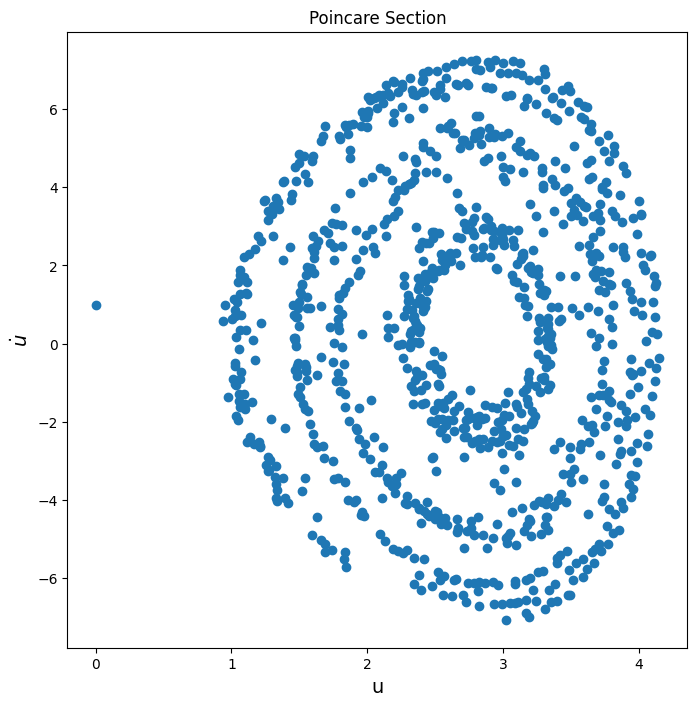

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(poincare_states[:,0], poincare_states[:,1])
plt.ylabel(r'$\dot{u}$', fontsize=14)
plt.xlabel(r'u', fontsize=14)
plt.title('Poincare Section')
plt.show()